# 5.) Deskriptive Datenanalyse

Beginnen wir wieder mit dem Import von **Pandas** und laden wir den uns bereits bekannten Datensatz.

In [1]:
import pandas as pd

daten = pd.read_csv("C:\\Datenfiles\\daten.csv")

daten.head(3)

,sex,age,wohnort,volksmusik,hardrock
0,1,50,2,2.666667,3.666667
1,1,57,1,1.000000,3.333333
2,2,66,3,2.000000,4.333333


### 5.1) Häufigkeitsanalyse

Anhand dieser Daten werden wir in diesem Kapitel nun erste deskriptive/explorative Auswertungen vornehmen. Beginnen wir zuerst mit Häufigkeitsanalysen.

Die Funktion **value_counts()** liefert uns die Häufigkeiten für die Ausprägungen der angegebenen Spalte (Variable).

[pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)

In [2]:
daten['wohnort'].value_counts()

3    139
1     95
2     60
Name: wohnort, dtype: int64

Damit die Sortierung aufsteigend nach den Ausprägungen der Variable (und nicht nach Häufigkeiten) erfolgt, fügen wir noch **sort_index()** an.

In [3]:
daten['wohnort'].value_counts().sort_index() # 'sort_index()' sortiert nach den Kategorien, nicht nach den Häufigkeiten

1     95
2     60
3    139
Name: wohnort, dtype: int64

Möchten wir nach Häufigkeiten sortieren, fügen wir **sort_values()** an. Je nachdem, ob wir nach Häufigkeiten auf- oder absteigend sortieren möchten, schreiben wir *ascending = True* oder *ascending = False* in die Klammer (wobei *True* die Standardeinstellung ist, man dies also nicht explizit hinschreiben muss).

In [4]:
daten['wohnort'].value_counts().sort_values(ascending = False)

3    139
1     95
2     60
Name: wohnort, dtype: int64

In [5]:
daten['wohnort'].value_counts().sort_values() # True ist standard

2     60
1     95
3    139
Name: wohnort, dtype: int64

Wir können auch den relativen Anteil (d.h. Prozent) jeder einzelnen Merkmalsausprägung ermitteln. Dazu fügen wir *normalize = True* hinzu. Für die Umrechnung in Prozent wurde hier noch mit 100 multipliziert, die Zahlen wurden dabei zuvor aus Gründen der Übersichtlichkeit auf 4 Kommastellen reduziert. Ausserdem werden nur die ersten 5 Zeilen angezeigt, da die Variable Alter viele Ausprägungen hat und der Output sonst zu lang wird.

In [6]:
daten['age'].value_counts(sort = False, normalize = True).head().round(4)*100
# Nach Kategoriennummer sortiert und in Prozent (relative Häufigkeiten) angegeben

15    0.34
20    0.34
21    2.38
22    4.76
23    5.44
Name: age, dtype: float64

Man kann erkennen, dass bspw. nur jeweils 0,34% 15 bzw. 20 Jahre alt sind.

Interessant ist ebenfalls, die kumulierten Summen zu ermitteln. Durch hinzufügen von **cumsum()** erhalten wir diese. Hier sieht man, dass insgesamt 0,68% bis inkl. 20 Jahre alt sind.

In [7]:
daten['age'].value_counts(sort = False, normalize = True).cumsum().head().round(4)*100 # kumulative Prozentwerte
# https://stackoverflow.com/questions/38891974/creating-a-cumulative-frequency-column-in-a-dataframe-python

15     0.34
20     0.68
21     3.06
22     7.82
23    13.27
Name: age, dtype: float64

##### Exkurs: Variablennamen als Attribute des Dataframes

Variablen(Spalten)namen können in neueren Versionen von **Pandas** nicht mehr nur in der Form *dataframename['variablenname']* geschrieben werden, sondern auch als Attribut des Dataframes in der Form *dataframename.variablenname*. Im Folgenden als Beispiel dieser Schreibweise nochmals der Befehl von vorhin, diesmal in der Attributschreibweise.

In [8]:
daten.age.value_counts(sort = False, normalize = True).cumsum().head().round(4)*100

15     0.34
20     0.68
21     3.06
22     7.82
23    13.27
Name: age, dtype: float64

##### Grafische Darstellung der Häufigkeiten

Aus den Häufigkeitsdaten können wir eine informative Grafik erstellen. Sollen die relativen und die kumulierten relativen Häufigkeiten in einem Diagramm abgebildet werden, weisen wir beides jeweils einem Objekt (unten mit *grafik1* und *grafik2* bezeichnet zu. Dann erstellen wir ein neues Dataframe (*grafik*), fügen diesem Dataframe die beiden vorhin erstellten Objekte hinzu und vergeben gleichzeitig informative Spaltennamen.

In [9]:
grafik1 = daten['age'].value_counts(sort = False, normalize = True).cumsum()*100
grafik2 = daten['age'].value_counts(sort = False, normalize = True)*100
grafik = pd.DataFrame()
grafik ['kumulierte Häufigkeiten'] = grafik1
grafik ['Häufigkeiten'] = grafik2

Den Inhalt des Dataframes veranschaulichen wir nun mit **plot.line()** als Liniendiagramm. Wie im Output ersichtlich, werden beide Häufigkeiten in der Grafik abgebildet.

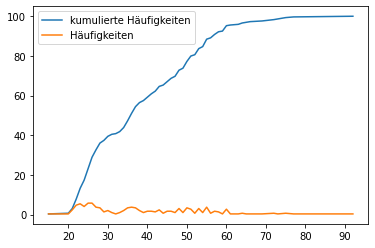

In [10]:
ax = grafik.plot.line(rot = 0)
# 'rot' würde eine Drehung (in Grad) der X-Achsen Beschriftung ermöglichen; in diesem Fall erfolgt keine Drehung

"Einfacher" (d.h. mit nur einer Codezeile, welche dafür aber etwas länger ist...) geht es mit folgender direkten Methode:

In [11]:
grafikneu = pd.DataFrame({'kum. H.' : daten['age'].value_counts(sort = False, normalize = True).cumsum()*100,
                     'H.' : daten['age'].value_counts(sort = False, normalize = True)*100})

Wir erhalten das gleiche Ergebnis wie vorhin.

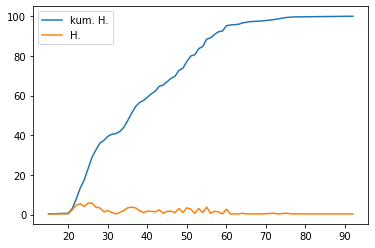

In [12]:
ax = grafikneu.plot.line(rot = 0)

Grafiken können natürlich auch gespeichert werden (mehr dazu in Kapitel 11 bzw. unter untenstehendem Link). Dazu müssen wir die Grafik mit **ax.get_figure()** zuerst einem neuen Objekt (*fig*) zuweisen.

[savefig()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.figure.Figure.html?highlight=savefig#matplotlib.figure.Figure.savefig)

In [13]:
fig = ax.get_figure()

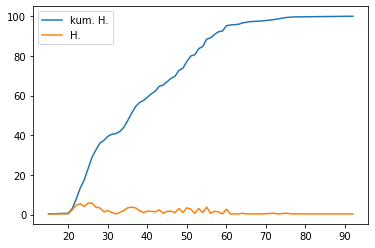

In [14]:
fig

Nun können wir die Grafik mit **savefig()** an einem selbst einzugebenden Pfad speichern (**ax.savefig** hätte nicht funktioniert), z.B. als PNG Datei mit einer Auflösung von 150 dpi - dies kann frei bestimmt werden, je größer der Wert, desto besser die Auflösung/Qualität, desto höher allerdings auch der Speicherplatzbedarf).

In [15]:
fig.savefig('C:\\Datenfiles\\test.png', dpi=150)

Durch *subplots = True* kann erreicht werden, dass die beiden Linien jeweils in eigenen Digrammen angezeigt werden. Die Legendenbeschriftung wird dabei von **Pandas** jeweils dort platziert, wo am ehesten Platz dafür vorhanden ist.

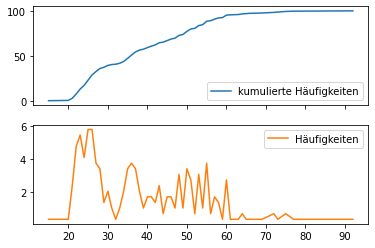

In [16]:
ax = grafik.plot.line(rot = 0, subplots = True)
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.line.html

### 5.2) Weitere deskriptive / explorative Analysen

Nach den Ausführungen zur Häufigkeitsanalyse geht es nun mit div. Lage- und Streuungsmaßen weiter. Den Anfang macht der arithmetische Mittelwert, den wir mit der Funktion **mean()** erhalten. Wie alle in weiterer Folge vorgestellten Maße lässt sich auch diese Funktion sowohl auf das ganze Dataframe (also alle Variablen) wie auch auf einzelne Spalten anwenden.

[pandas.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html#pandas.DataFrame.mean)

In [17]:
daten.mean() # Mittelwert für alle Variablen im Dataframe, nicht gerundet

sex            1.435374
age           38.517007
wohnort        2.149660
volksmusik     3.769274
hardrock       2.978458
dtype: float64

Wir können uns die Mittelwerte mit der Funktion **round()** auch gerundet - bspw. auf 2 Dezimalstellen - ausgeben lassen.

[pandas.DataFrame.round](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html)

In [18]:
daten.mean().round(2)

sex            1.44
age           38.52
wohnort        2.15
volksmusik     3.77
hardrock       2.98
dtype: float64

Wie können wir uns den Mittelwert einer Variable (Spalte) ausgeben lassen? Einfach...

In [19]:
daten.age.mean() # oder: daten['age'].mean()

38.51700680272109

Schöner - bzw. für manche Zwecke der Darstellung in Texten brauchbarer - wäre aber ein gerundeter Wert.

In [20]:
daten.age.mean().round(2)

AttributeError: 'float' object has no attribute 'round'

Offenbar funktioniert die Funktion **round()** für einzelne Variablen nicht; zumindest nicht in dieser Schreibweise. Vgl. dazu auch so manche Diskussionen im Internet, bspw.: [AttributeError: 'float' object has no attribute 'round'](https://stackoverflow.com/questions/48732158/int-object-has-no-attribute-round)

Möglich ist folgende Schreibweise:

In [22]:
daten[['age']].mean().round(2)

age    38.52
dtype: float64

Allerdings bekommen wird dann nicht nur den Mittelwert, sondern auch den *dtype* ausgegeben. Das ist für Texte nicht zu gebrauchen, vgl. folgendes Beispiel:

In [23]:
print("Der Mittelwert des Alters beträgt:", daten[['age']].mean().round(2), "Jahre")

Der Mittelwert des Alters beträgt: age    38.52
dtype: float64 Jahre


Folgende Schreibweise führt zum Erfolg:

In [24]:
round(daten.age.mean(), 2)

38.52

In [25]:
print("Der Mittelwert des Alters beträgt:", round(daten['age'].mean(), 2), "Jahre")

Der Mittelwert des Alters beträgt: 38.52 Jahre


Es handelt sich dabei um die **round()** Funktion von Python ('built-in' Funktion [round](https://docs.python.org/3/library/functions.html#round)), nicht um die **round()** Funktion aus Pandas [pandas.DataFrame.round](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html)

Dieses Problem der Rundung beschäftigt uns auch bei der Ausgabe der Standardabweichung, wie wir gleich sehen werden.

Die Standardabweichung erhalten wir mit **std()**, sie ist in der selben Einheit wie der Mittelwert, nämlich in Jahren. Fügen wir dies gleich mit einer **print()** Funktion ein.

[pandas.DataFrame.std](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html#pandas.DataFrame.std)

In [28]:
print(round(daten.age.std(), 2),"Jahre") # Standardabweichung

13.93 Jahre


Wenn wir schon dabei sind, geben wir gleich den Mittelwert und die Standardabweichung (welche ohnehin zumeist gemeinsam interpretiert werden) in einer leicht lesbaren Form aus.

In [30]:
print("Durchschnittsalter:", round(daten.age.mean(), 2),
      "Jahre (Standardabweichung:", round(daten.age.std(), 2),"Jahre)")

Durchschnittsalter: 38.52 Jahre (Standardabweichung: 13.93 Jahre)


Für die Rundung von Mittelwert und Standardabweichung (wenn wir uns die Werte einer einzelnen Variable (Spalte) ausgeben lassen möchten) benötigen wir also 'built-in' Funktion **round()** von Python, und nicht jene von **Pandas**.

Eine übliche Kennzahl zum Vergleich der Streuung von verschiedenen Variablen ist der Variationskoeffizient. Er berechnet sich aus (Standardabweichung/Mittelwert)*100 (und kann somit als Prozentzahl interpretiert werden).

Sehen wir nachfolgenden an, welche der beiden Variablen *volksmusik* und *hardrock* eine breitere Streuung der Antworten aufweist.

In [39]:
daten.head(3)

,sex,age,wohnort,volksmusik,hardrock
0,1,50,2,2.666667,3.666667
1,1,57,1,1.000000,3.333333
2,2,66,3,2.000000,4.333333


In [44]:
vk_vm, vk_hr = ((daten.volksmusik.std())/(daten.volksmusik.mean())*100,
                (daten.hardrock.std())/(daten.hardrock.mean())*100)

In [45]:
print("Die Variable 'Volksmusik' weist einen Variationskoeffizienten von", vk_vm,
      "auf, die Variable 'Hardrock' einen Variationskoeffizienten von", vk_hr)

# Man könnte die Variationskoeffizienten auch noch runden (vgl. Python 'built-in' Funktion 'round()',
# aber dann wäre die Formel noch länger und unübersichtlicher

Die Variable 'Volksmusik' weist einen Variationskoeffizienten von 29.904393232025267 auf, die Variable 'Hardrock' einen Variationskoeffizienten von 36.047401216687


Die breitere Streuung um den Mittelwert weist also die Variable *hardrock* auf.

Sehen wir uns in weiterer Folge nun noch andere Lage- und Streuunsmaße an.

Den Standardfehler des Mittelwerts erhalten wir mit der Funktion **sem()**. Ab hier funktioniert übrigens die **round()** Funktion aus **Pandas** wieder. Diese ist in der Handhabung einfacher und wird daher von mir bevorzugt, wann immer möglich.

[pandas.DataFrame.sem](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sem.html#pandas.DataFrame.sem)

In [47]:
daten['age'].sem().round(3) # Standardfehler des Mittelwerts

0.812

Den Median, ein gegenüber Ausreißern robustes Lagemaß (der mittlere Wert einer geordneten Zahlenreihe), erhalten wir mit **median()**. Er liegt in diesem Fall um rund 2,5 Jahre unter dem Mittelwert, was auf eine leicht rechtsschiefe Verteilung des Alters schließen lässt.

[pandas.DataFrame.median](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html#pandas.DataFrame.median)

In [48]:
daten['age'].median() # Median

36.0

Testen wir die Schiefe nach dieser Behauptung gleich mit **skew()**.

[pandas.DataFrame.skew](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.skew.html#pandas.DataFrame.skew)

In [49]:
daten['age'].skew().round(3) # Schiefe (in diesem Fall leicht rechtsschief)

0.661

Der Modalwert (bzw. Modus) ist der häufigste Wert einer Variable; es können auch mehrere Werte gleich häufig vorkommen, dann gibt es mehrere Modalwerte. In diesem Beispiel erhalten wir nach Anwendung der Funktion **mode()** das Ergebnis, dass ein Alter von 25 sowie von 26 Jahren jeweils am häufigsten vorkommt - es gibt 2 Modalwerte.

[pandas.DataFrame.mode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html#pandas.DataFrame.mode)

In [50]:
daten['age'].mode() # Modalwert (2 in diesem Fall)

0    25
1    26
dtype: int64

Überprüfen wir dieses Ergebnis mit mit bereits bekannter Methode, nämlich der Funktion **value_counts()**, so sehen wir, das tatsächlich 25 Jahre und 26 Jahre jeweils gleich oft am häufigsten vorkommt.

In [51]:
daten['age'].value_counts().sort_values(ascending = False).head(10) # output mit 'head()' eingeschränkt, da sonst zu lang

25    17
26    17
23    16
22    14
24    12
55    11
36    11
27    11
50    10
35    10
Name: age, dtype: int64

Den kleinsten bzw. den größten Wert einer Variable liefern uns **min()** bzw. **max()**.

[pandas.DataFrame.min](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html#pandas.DataFrame.min)

In [52]:
daten['age'].min() # Minimaler Wert

15

[pandas.DataFrame.max](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html#pandas.DataFrame.max)

In [53]:
daten['age'].max() # Maximaler Wert

92

Mit **quantile()** können wir uns beliebige, also selbst definierbare, Quantile einer Variable ausgeben lassen. In folgenden Beispiel sehen wir uns die Dezile für die 3 metrischen Variablen im Datensatz an. Man beachte: Wird mehr als eine Variable des Dataframes ausgewählt, müssen die Variablen in doppelter eckiger Klammer angeführt werden!

[pandas.DataFrame.quantile](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html#pandas.DataFrame.quantile)

[Spezielle Quantile](https://de.wikipedia.org/wiki/Empirisches_Quantil#Spezielle_Quantile)

In [54]:
daten[['age', 'volksmusik', 'hardrock']].quantile([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]) # Quantile, beliebige einstellbar
# Durch die Angabe von '0' und '1' erhält man den Minimal- bzw. Maximalwert

,age,volksmusik,hardrock
0.0,15.0,1.000000,1.000000
0.1,23.0,2.000000,1.333333
0.2,25.0,3.000000,2.000000
0.3,27.0,3.333333,2.333333
0.4,31.0,3.666667,2.666667
0.5,36.0,4.000000,3.000000
0.6,41.0,4.333333,3.333333
0.7,48.0,4.666667,3.666667
0.8,51.4,5.000000,4.000000
0.9,57.0,5.000000,4.333333


Die Funktion **describe()** schließlich liefert uns auf einen Schlag gleich mehrere gebräuchliche Kennzahlen, entweder für alle Variablen im Datensatz oder für ausgewählte Variablen.

[pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe)

In [55]:
daten.describe()

,sex,age,wohnort,volksmusik,hardrock
count,294.000000,294.000000,294.00000,294.000000,294.000000
mean,1.435374,38.517007,2.14966,3.769274,2.978458
std,0.496651,13.930032,0.88100,1.127179,1.073657
min,1.000000,15.000000,1.00000,1.000000,1.000000
25%,1.000000,26.000000,1.00000,3.000000,2.333333
50%,1.000000,36.000000,2.00000,4.000000,3.000000
75%,2.000000,50.000000,3.00000,4.666667,3.666667
max,2.000000,92.000000,3.00000,5.000000,5.000000


Im folgenden Beispiel wählen wir nur zwei metrische Variablen aus. Ausserdem wollen wir nicht alle standardmäßig ausgegebenen Kennzahlen, sondern nur die Anzahl (*count*), den Mittelwert (*mean*), die Standardabweichung (*std*) sowie den Median (*50%*). Diese Auswahl übergeben wir mit **loc** (wieder in doppelter eckiger Klammer, da wir mehrere Zeilen auswählen).

[pandas.DataFrame.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)

In [77]:
daten[['age', 'hardrock']].describe().loc[['count', 'mean', 'std', '50%']] # 50% Quantil = Median

,age,hardrock
count,294.000000,294.000000
mean,38.517007,2.978458
std,13.930032,1.073657
50%,36.000000,3.000000


Die Art der Darstellung kann mit **unstack()** auch geändert werden. Die Variablen sind nun nicht mehr horizontal nebeneinander sondern vertikal untereinander gelistet.

In [78]:
daten.describe().loc[['mean', 'std']].unstack().round(3)

sex         mean     1.435
            std      0.497
age         mean    38.517
            std     13.930
wohnort     mean     2.150
            std      0.881
volksmusik  mean     3.769
            std      1.127
hardrock    mean     2.978
            std      1.074
dtype: float64

##### M-Estimator nach Huber

Bei den M-Schätzern handelt es sich um eine etwas fortgeschrittenere Methode; da sie aber gut zum Thema dieses Kapitels passen sei hier kurz gezeigt, wie man den M-Schätzer nach Huber erhalten kann.

M-Schätzer sind im Vergleich zum arithmetischen Mittelwert robuster gegenüber Ausreißern, weil sie diese bei Berechnung des Mittelwerts geringer gewichten. Ein bekannter M-Schätzer ist jener von Huber, bei dem man einen Bereich definieren kann, innerhalb dessen sämtliche Werte voll gewichtet werden. Ausserhalb dieses Bereichs werden Werte mit zunehmender Entfernung immer geringer gewichtet (im Gegensatz zu manchen anderen M-Schätzern aber nie mit 0).

Die Berechnung von M-Schätzern ist mit **Pandas** nicht möglich, wir greifen dazu auf eine Funktion des Pakets **Statsmodels** zurück.

[statsmodels.robust.scale.Huber](https://www.statsmodels.org/stable/generated/statsmodels.robust.scale.Huber.html#statsmodels.robust.scale.Huber)

[M-Schätzer](https://de.wikipedia.org/wiki/M-Sch%C3%A4tzer)

[Weight Functions](https://www.statsmodels.org/stable/rlm_techn1.html)

Das noch genauer anschauen und auch gegenchecken mit Excel Add-in!

Für (einigermaßen) normalverteilte Daten zeigt folgende Tabelle eine Übersicht gebräuchlicher Tuningkonstanten k (bzw. c auf Englisch) sowie den Bereich der Daten, der voll gewichtet wird. Kleinere Tuningkonstanten gewichten somit mehr Daten geringer als größere Tuningkonstanten. In der dritten Spalten stehen die üblichen Bezeichnungen (Hubers Proposal 2).

|Tuningkonstante c|voll gewichteter Bereich|Bezeichnung|
|-|-|-|
|1.960|~95%|H19|
|1.645|~90%|H16|
|1.282|~80%|H12|
|0.842|~60%|H8|

In [79]:
import statsmodels.api as sm

sm.robust.scale.Huber(c = 1.2)(daten['age']) # c = die Tuningkonstante, vgl. obige Tabelle

(array(37.68428874), array(15.33869259))

Die Ausgabe oben zeigt als erste Zahl den geschätzten Mittelwert nach Huber und als zweite Zahl die dazugehörige Streuung. Diese beiden Werte dienen als robuste Alternative zum arithmetischen Mittelwert und dessen Standardabweichung. Die Grafik unten dient nur dazu, die div. Mittelwerte (Mittelwert, Median, M-Schätzer) und deren Streuungen zu verorten.

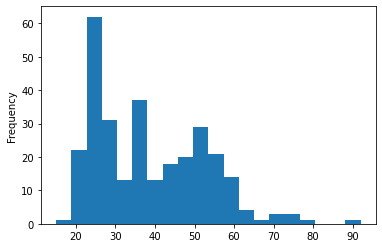

In [80]:
ax = daten.age.plot.hist(bins = 20) # Histogramm mit (max.) 20 Balken

Wenn wir schon bei robusten Lage- und Streuungsmaßen sind, rufen wir uns nochmal den Median in Erinnerung. Auch dieser ist ein robustes Lagemaß.

In [81]:
daten.age.median() 

36.0

Dazu liegt mit der 'median absolute deviation' auch ein entsprechendes Streuungsmaß vor, welches auch mit der Funktion **mad()** ausgegben werden kann.

[pandas.DataFrame.mad](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mad.html)

In [82]:
daten.age.mad()

11.80832060715442

Analog zum Variationskoeffizienten, welche den arithmetischen Mittelwert und die dazugehörige Standardabweichung verwendet, kann man als robustes Äquivalent auch die (median absolute deviation)/(median)*100 berechnen.

In [83]:
robuster_vk = ((daten.age.mad())/(daten.age.median()))*100

In [84]:
normaler_vk = ((daten.age.std())/(daten.age.mean()))*100

In [88]:
print("Robuster Variationskoeffizient:", round(robuster_vk, 2),"% vs. normaler Variationskoeffizient:", round(normaler_vk, 2), "%")

Robuster Variationskoeffizient: 32.8 % vs. normaler Variationskoeffizient: 36.17 %
